## Name: Harsh Chaudhari

## Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [4]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [6]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([
    Dense(64,activation ='relu',input_shape=(3072,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [10]:
epochs = 10
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9345 - accuracy: 0.2885 - val_loss: 1.8217 - val_accuracy: 0.3268
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7730 - accuracy: 0.3552 - val_loss: 1.7003 - val_accuracy: 0.3845
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7041 - accuracy: 0.3846 - val_loss: 1.6833 - val_accuracy: 0.3957
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6636 - accuracy: 0.4013 - val_loss: 1.6922 - val_accuracy: 0.3864
Epoch 5/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6383 - accuracy: 0.4107 - val_loss: 1.6320 - val_accuracy: 0.4077
Epoch 6/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6167 - accuracy: 0.4206 - val_loss: 1.6816 - val_accuracy: 0.3930
Epoch 7/10
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5978 - accuracy: 0.4255 - val_loss: 1.6120 - val_accuracy:

In [11]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 0s 721us/step
              precision    recall  f1-score   support

           0       0.62      0.38      0.47      1000
           1       0.56      0.54      0.55      1000
           2       0.37      0.16      0.23      1000
           3       0.29      0.30      0.30      1000
           4       0.38      0.39      0.38      1000
           5       0.47      0.12      0.19      1000
           6       0.36      0.69      0.48      1000
           7       0.48      0.53      0.50      1000
           8       0.48      0.69      0.57      1000
           9       0.45      0.58      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.42     10000
weighted avg       0.45      0.44      0.42     10000



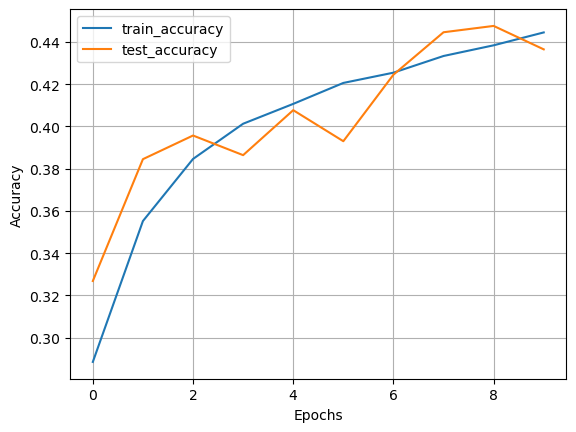

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

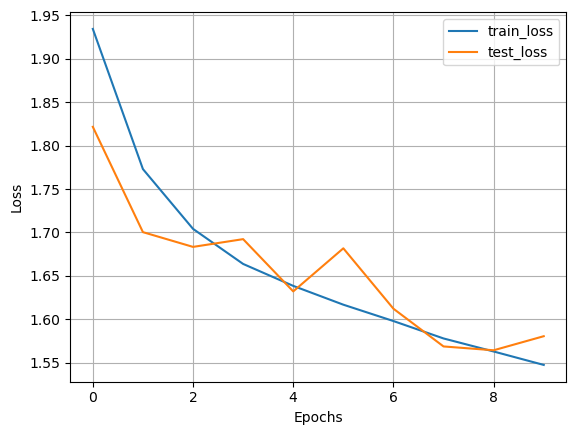

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();

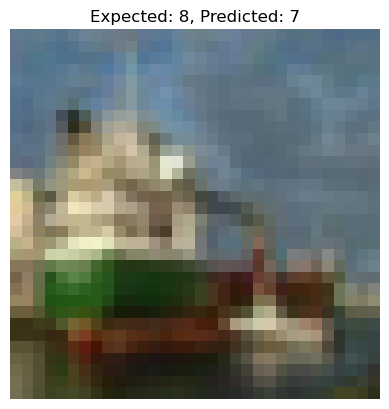

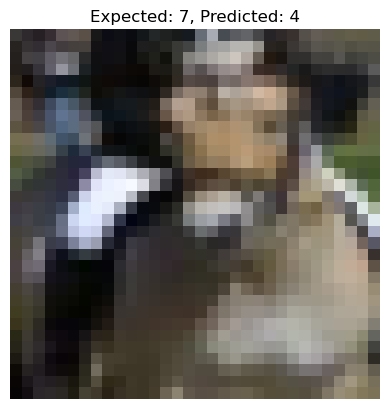

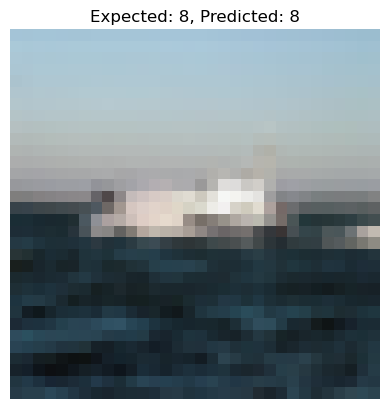

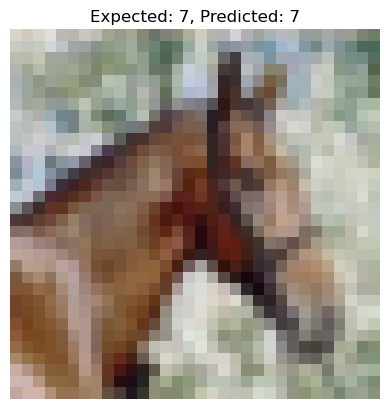

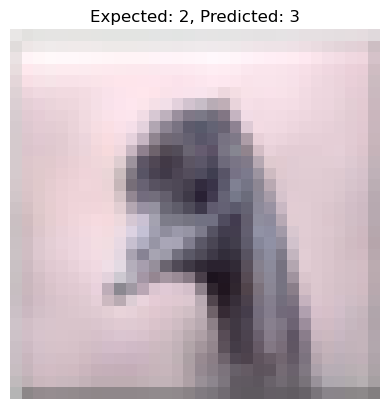

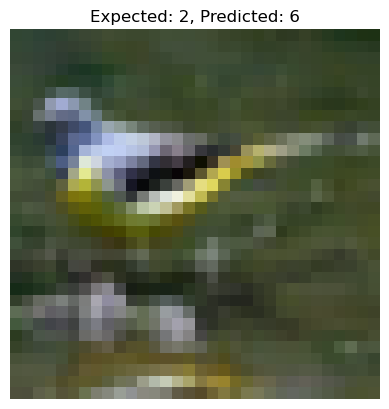

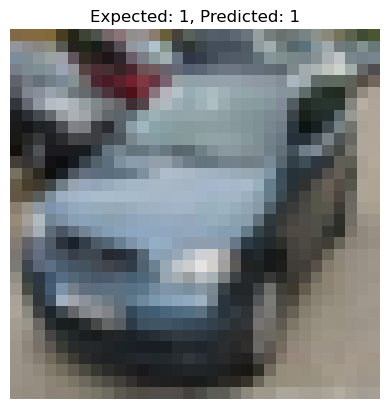

In [17]:
import numpy as np
n = 7
indices = np.random.choice(len(X_test), n)
for i, idx in enumerate(indices):
    expected_label = y_test[idx]
    predicted_label = np.argmax(predition[idx])

    # Display the image with labels
    plt.imshow(X_test[idx].reshape(32,32,3))
    plt.title(f'Expected: {expected_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()